#Remove Duplicates

In [2]:


import os
import glob
import pandas as pd
from IPython.display import display

# Cek file default
candidates = ["reviews_stemmed.xlsx", "full_preprocessing.xlsx", "reviews_filtered.xlsx"]
found = None
for f in candidates:
    if os.path.exists(f):
        found = f
        break

# Jika tidak ada, coba cari file reviews_*.xlsx di working dir
if not found:
    files = sorted(glob.glob("reviews_stemmed*.xlsx"))
    if files:
        found = files[-1]  # ambil yang terakhir ditemukan

if not found:
    raise FileNotFoundError("File input tidak ditemukan. Pastikan 'reviews_stemmed.xlsx' atau file preprocessing lain ada di working directory.")

print(f"Membaca file: {found}")
data = pd.read_excel(found)

print("Kolom yang tersedia:", list(data.columns))

# Pastikan kolom 'stemmed' atau alternatif ada
if 'stemmed' not in data.columns:
    # cek kemungkinan nama lain seperti 'token_stemmed' atau 'tokens'
    alt = [c for c in data.columns if 'stem' in c.lower() or 'token' in c.lower()]
    if alt:
        print(f"Kolom 'stemmed' tidak ditemukan. Menggunakan kolom alternatif: {alt[0]}")
        data.rename(columns={alt[0]: 'stemmed'}, inplace=True)
    else:
        raise KeyError("Kolom 'stemmed' tidak ditemukan. Mohon cek nama kolom hasil stemming di file input.")

# Normalisasi format kolom 'stemmed' jadi list Python
import ast
def ensure_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    if isinstance(x, str):
        x = x.strip()
        # jika string terlihat seperti "['a','b']"
        if x.startswith('[') and x.endswith(']'):
            try:
                return ast.literal_eval(x)
            except Exception:
                # fallback: hapus bracket lalu split by comma/space
                inner = x[1:-1].strip()
                if ',' in inner:
                    return [tok.strip().strip("'\"") for tok in inner.split(',') if tok.strip()]
                return inner.split()
        # jika string kata-kata dipisah spasi
        return x.split()
    # fallback
    return list(x)

data['stemmed'] = data['stemmed'].apply(ensure_list)

if 'filtered' not in data.columns:
    def filter_tokens(tokens):
        return [w for w in tokens if isinstance(w, str) and len(w) > 3]
    data['filtered'] = data['stemmed'].apply(filter_tokens)

# Hapus duplikat berdasarkan kolom 'filtered' (sering kali list harus di-convert ke tuple untuk dedup)
before = len(data)
data['__filtered_key'] = data['filtered'].apply(lambda x: tuple(x))
data = data.drop_duplicates(subset=['__filtered_key']).drop(columns=['__filtered_key'])
after = len(data)

print(f"Duplikat terhapus: {before - after} baris\n")
print("Berikut 20 data setelah duplikat dihapus:")

data.to_excel("reviews_removed_duplicates.xlsx", index=False, engine='openpyxl')
print("\nFile 'reviews_removed_duplicates.xlsx' berhasil disimpan!")

display(data.head(20))


Membaca file: reviews_stemmed.xlsx
Kolom yang tersedia: ['no_stopwords', 'stemmed']
Duplikat terhapus: 30 baris

Berikut 20 data setelah duplikat dihapus:

File 'reviews_removed_duplicates.xlsx' berhasil disimpan!


,no_stopwords,stemmed,filtered
0,"['makanan', 'laut', 'segar', 'harga', 'terjang...","[makan, laut, segar, harga, jangkau, cocok, ke...","[makan, laut, segar, harga, jangkau, cocok, ke..."
1,"['langsung', 'sambut', 'ramah', 'megah']","[langsung, sambut, ramah, megah]","[langsung, sambut, ramah, megah]"
2,"['salah', 'makan', 'seafood', 'seputaran', 'ge...","[salah, makan, seafood, putar, gejayan, gurame...","[salah, makan, seafood, putar, gejayan, gurame..."
3,"['lokasi', 'strategis', 'parkir', 'mobil', 'te...","[lokasi, strategis, parkir, mobil, tepi, jalan...","[lokasi, strategis, parkir, mobil, tepi, jalan..."
4,"['enak', 'pricey', 'worth', 'it']","[enak, pricey, worth, it]","[enak, pricey, worth]"
5,"['enak', 'lumayan', 'murah', 'porsinya', 'kehi...","[enak, lumayan, murah, porsi, hitung, cepat, k...","[enak, lumayan, murah, porsi, hitung, cepat, k..."
6,"['diteriakin', 'gapa', 'mas', 'mbak', 'pribadi...","[diteriakin, gapa, mas, mbak, pribadi, lebuh, ...","[diteriakin, gapa, mbak, pribadi, lebuh, senang]"
7,"['pelayanan', 'ramah', 'bau', 'bakaran', 'meng...","[layan, ramah, bau, bakar, gugah, bikin, ken, ...","[layan, ramah, bakar, gugah, bikin, mampir, ma..."
8,"['menu', 'seafood', 'istimewa', 'istimewa', 'h...","[menu, seafood, istimewa, istimewa, harga, jan...","[menu, seafood, istimewa, istimewa, harga, jan..."
9,"['pelayanannya', 'bagus']","[layan, bagus]","[layan, bagus]"


In [3]:

from nltk import bigrams
from google.colab import files

# Buat kolom baru 'bigram'
data['bigram'] = data['filtered'].apply(lambda tokens: [' '.join(b) for b in bigrams(tokens)])

print("Bigram Extraction selesai! Berikut 20 hasil pertama:")
display(data[['filtered', 'bigram']].head(20))

# Simpan hasil ke Excel
data.to_excel("reviews_bigram.xlsx", index=False, engine='openpyxl')
print("\nFile 'reviews_bigram.xlsx' berhasil disimpan!")

# Unduh hasil (opsional)
# files.download("reviews_bigram.xlsx")


Bigram Extraction selesai! Berikut 20 hasil pertama:


,filtered,bigram
0,"[makan, laut, segar, harga, jangkau, cocok, ke...","[makan laut, laut segar, segar harga, harga ja..."
1,"[langsung, sambut, ramah, megah]","[langsung sambut, sambut ramah, ramah megah]"
2,"[salah, makan, seafood, putar, gejayan, gurame...","[salah makan, makan seafood, seafood putar, pu..."
3,"[lokasi, strategis, parkir, mobil, tepi, jalan...","[lokasi strategis, strategis parkir, parkir mo..."
4,"[enak, pricey, worth]","[enak pricey, pricey worth]"
5,"[enak, lumayan, murah, porsi, hitung, cepat, k...","[enak lumayan, lumayan murah, murah porsi, por..."
6,"[diteriakin, gapa, mbak, pribadi, lebuh, senang]","[diteriakin gapa, gapa mbak, mbak pribadi, pri..."
7,"[layan, ramah, bakar, gugah, bikin, mampir, ma...","[layan ramah, ramah bakar, bakar gugah, gugah ..."
8,"[menu, seafood, istimewa, istimewa, harga, jan...","[menu seafood, seafood istimewa, istimewa isti..."
9,"[layan, bagus]",[layan bagus]



File 'reviews_bigram.xlsx' berhasil disimpan!


#Trigram

In [4]:


from nltk import trigrams
from google.colab import files

# Buat kolom baru 'trigram'
data['trigram'] = data['filtered'].apply(lambda tokens: [' '.join(t) for t in trigrams(tokens)])

print("Trigram Extraction selesai! Berikut 20 hasil pertama:")
display(data[['filtered', 'trigram']].head(20))

# Simpan hasil ke Excel
data.to_excel("reviews_trigram.xlsx", index=False, engine='openpyxl')
print("\nFile 'reviews_trigram.xlsx' berhasil disimpan!")

# Unduh hasil (opsional)
# files.download("reviews_trigram.xlsx")


Trigram Extraction selesai! Berikut 20 hasil pertama:


,filtered,trigram
0,"[makan, laut, segar, harga, jangkau, cocok, ke...","[makan laut segar, laut segar harga, segar har..."
1,"[langsung, sambut, ramah, megah]","[langsung sambut ramah, sambut ramah megah]"
2,"[salah, makan, seafood, putar, gejayan, gurame...","[salah makan seafood, makan seafood putar, sea..."
3,"[lokasi, strategis, parkir, mobil, tepi, jalan...","[lokasi strategis parkir, strategis parkir mob..."
4,"[enak, pricey, worth]",[enak pricey worth]
5,"[enak, lumayan, murah, porsi, hitung, cepat, k...","[enak lumayan murah, lumayan murah porsi, mura..."
6,"[diteriakin, gapa, mbak, pribadi, lebuh, senang]","[diteriakin gapa mbak, gapa mbak pribadi, mbak..."
7,"[layan, ramah, bakar, gugah, bikin, mampir, ma...","[layan ramah bakar, ramah bakar gugah, bakar g..."
8,"[menu, seafood, istimewa, istimewa, harga, jan...","[menu seafood istimewa, seafood istimewa istim..."
9,"[layan, bagus]",[]



File 'reviews_trigram.xlsx' berhasil disimpan!


#WordCloud

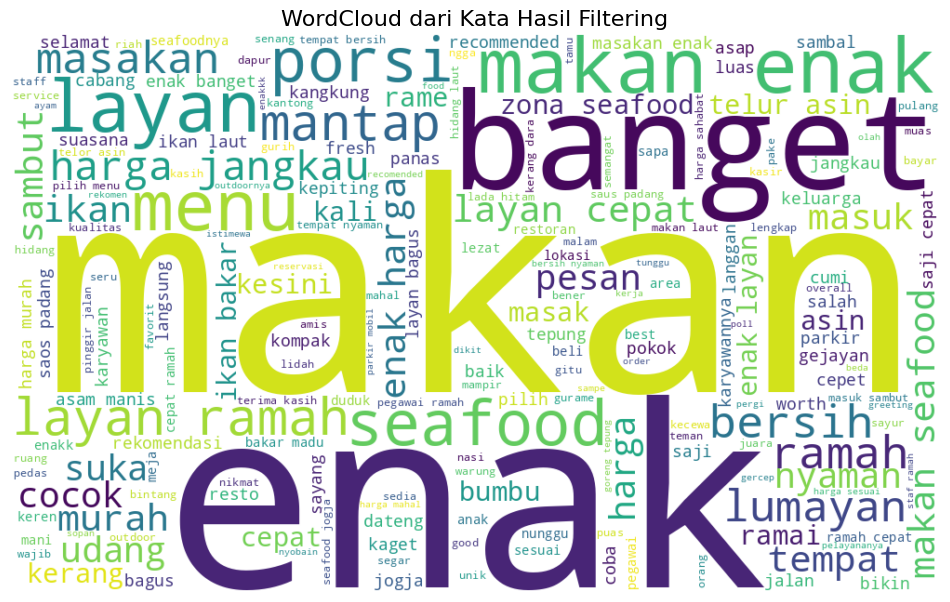


WordCloud berhasil ditampilkan dan file 'reviews_wordcloud_source.xlsx' disimpan!


In [5]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

# Gabungkan semua kata hasil filtering
all_words = ' '.join([' '.join(tokens) for tokens in data['filtered']])

# Buat wordcloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_words)

# Tampilkan
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Kata Hasil Filtering", fontsize=16)
plt.show()

# (Opsional) Simpan teks hasil akhir biar bisa diunduh juga
data.to_excel("reviews_wordcloud_source.xlsx", index=False, engine='openpyxl')
print("\nWordCloud berhasil ditampilkan dan file 'reviews_wordcloud_source.xlsx' disimpan!")

# Unduh hasil (opsional)
# files.download("reviews_wordcloud_source.xlsx")


#Unduh Output Dalam EXcel

In [7]:
import pandas as pd
import glob

# Ambil semua file hasil preprocessing
files = sorted(glob.glob("reviews_*.xlsx"))
print("File ditemukan:", files)

# Gabungkan ke satu file Excel
with pd.ExcelWriter("Remove_Bigram_Trigram_wordcloud.xlsx", engine="openpyxl") as writer:
    for file in files:
        df = pd.read_excel(file)
        sheet_name = file.replace("reviews_", "").replace(".xlsx", "")
        df.to_excel(writer, sheet_name=sheet_name[:31], index=False)

print("Semua file berhasil digabung jadi 'Remove_Bigram_Trigram_wordcloud.xlsx'!")


File ditemukan: ['reviews_bigram.xlsx', 'reviews_filtered.xlsx', 'reviews_removed_duplicates.xlsx', 'reviews_trigram.xlsx', 'reviews_wordcloud_source.xlsx']
Semua file berhasil digabung jadi 'Remove_Bigram_Trigram_wordcloud.xlsx'!
